In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
raw_data= pd.read_csv('D:\Linear Regression/Titani Train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
raw_data.shape

(891, 12)

In [4]:
percent = (raw_data.isnull().sum()/raw_data.isnull().count()).sort_values(ascending=False)
percent

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [5]:
raw_data=raw_data.drop('Cabin' , axis=1)
raw_data=raw_data.drop('PassengerId' , axis=1)
raw_data=raw_data.drop('Name' , axis=1)
raw_data=raw_data.drop('Ticket' , axis=1)

raw_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


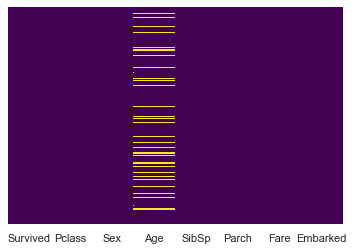

In [6]:
sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

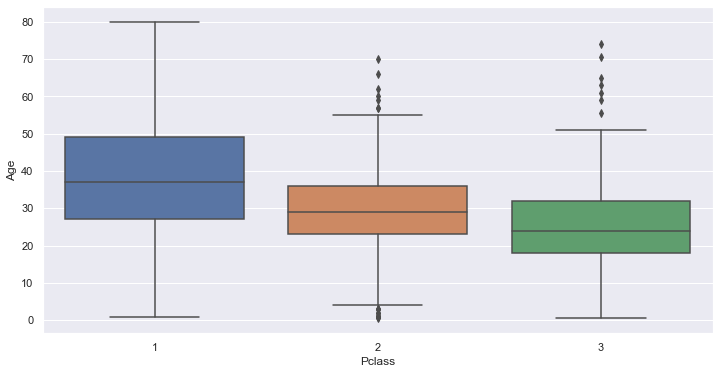

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y="Age", data=raw_data)

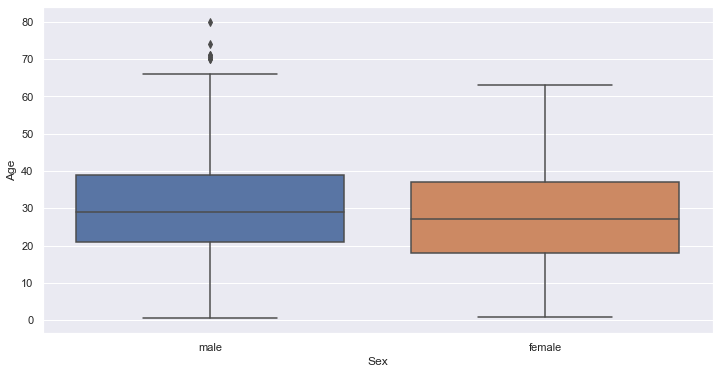

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Sex', y="Age", data=raw_data)

In [9]:
raw_data['Age'] = raw_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

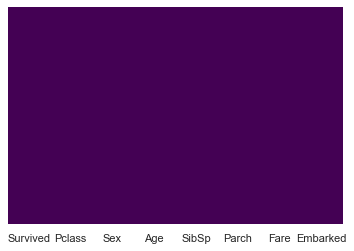

In [10]:
sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

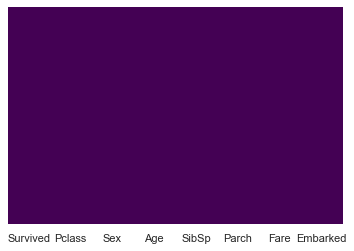

In [11]:
raw_data.dropna(axis=0,inplace=True)
sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

(889, 8)

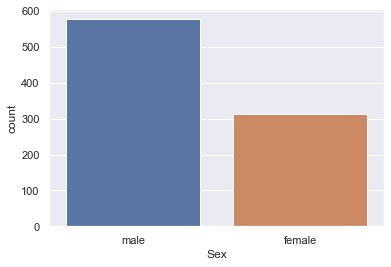

In [12]:
sns.countplot(x='Sex',data=raw_data)
raw_data.shape

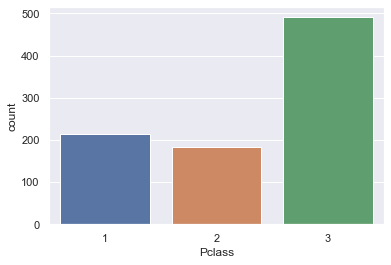

In [13]:
sns.countplot(x='Pclass',data=raw_data)

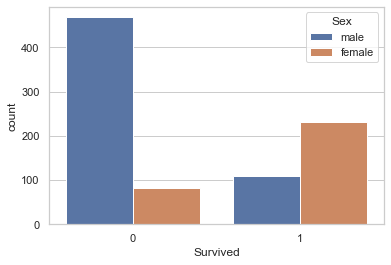

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=raw_data)

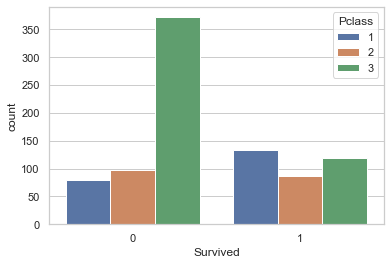

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=raw_data)

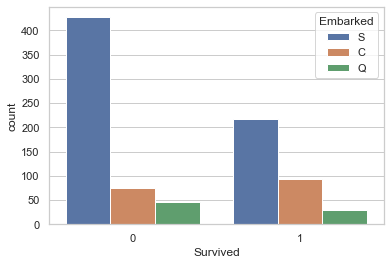

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=raw_data)

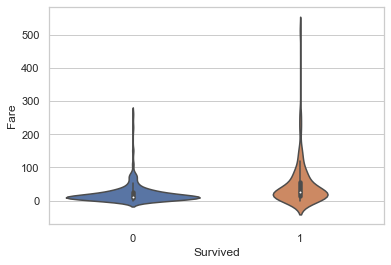

In [17]:
sns.set_style('whitegrid')
sns.violinplot(x='Survived', y='Fare', data=raw_data)

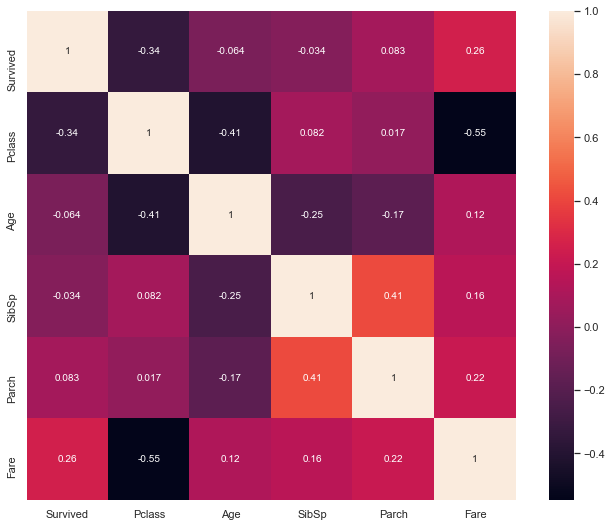

In [18]:
corrmat = raw_data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True)

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 102.5+ KB


In [20]:
train=pd.get_dummies(raw_data,drop_first=True)

In [21]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
X_train=train.drop('Survived',axis=1)
Y_train=train['Survived']

In [23]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.2)

In [24]:
#from sklearn.linear_model import LogisticRegression 
#Model = LogisticRegression()
#Model.fit(X_train, Y_train)

In [25]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier()
Model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
test=pd.read_csv('D:\Linear Regression/Titanic test.csv')

In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
test=test.drop('Cabin' , axis=1)
test=test.drop('PassengerId' , axis=1)
test=test.drop('Name' , axis=1)
test=test.drop('Ticket' , axis=1)
test=pd.get_dummies(test,drop_first=True)

In [30]:
test['Age'] = test.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [31]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [32]:
test['Fare'].fillna(14,inplace=True)

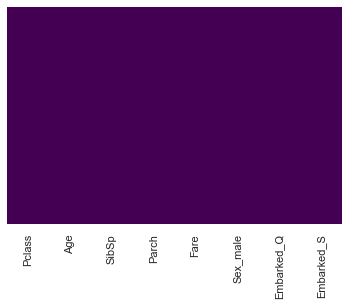

In [33]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
test=pd.get_dummies(test,drop_first=True)

In [35]:
y_pred = Model.predict(test)

In [36]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
predict=pd.DataFrame(y_pred)
sub_df=pd.read_csv(r'D:\Linear Regression\gender_submission.csv')

In [38]:
dataset=pd.concat([sub_df['PassengerId'],predict],axis=1)
dataset.columns=['PassengerId','Survived']

In [39]:
dataset.to_csv(r'D:\Linear Regression\Titanic_2.csv',index=False)